# 2022 빅콘테스트 

## 문제

앱 사용성 데이터를 통한 대출신청 예측분석


---


가명화된 데이터를 기반으로 고객의 대출상품 신청여부 예측
(2022년 3~5월 데이터제공 / 2022년 6월 예측)
* 예측모델을 활용하여 탐색적 데이터 분석 수행
* 대출신청, 미신청 고객을 분류하여 고객의 특성 분석결과 도출



- 회원 가입 이후 특정 기간안에 대출 신청 여부를 예측
  
- 핀다 홈화면 진입 고객의 모델 기반 고객 군집 분석
  
  모두가 대출을 원하진 않는다!
  
  여러 고객 군집별로 서비스 메시지를 제안한다.

- 비교대출 서비스
    - 최적의 대출 경험 제공
    - 고객 정보 제출 - 대출 조건을 받아 비교 선택
    - 핀다 사용자 **10명 중 6명은 중금리대출**
    - 인터넷 은행이 채우지 못한 중금리대출의 니즈를 채워줌
    - 핀다의 홈화면 진입 고객 중 특정 기간 안에 대출 신청 고객을 예측

<신청 과정>

- 홈화면을 통해 신청 시작
- 회원 가입을 통해 정보 수집
- 홈화면의 대출신청 버튼을 통해 대출목적, 희망금액 입력
- 자산정보입력
- 인증서 사용여부 선택
1. 회원 가입 이후 특정 기간안에 대출 신청 여부를 예측
    
    최종 모델평가는 승인된 상품 정보 기준 하나 이상을 선택해 대출한 고객을 예측하는 것
    
    → 예측 정확도 평가 지표 : (이진분류) F1-score
    
    모델링 정확도 만큼이나 데이터 분석, 모델링 과정을 평가에 반영
    
    label = 앱 사용자가 대출 조회를 하고, 승인된 금융상품 중 최소 하나를 선택하여 실제 대출을 실행한 경우 y로 표시
    
    학습 데이터와 시점상 크게 다르지 않음
    
    → 직전 데이터의 영향이 너무 크지 않도록
    
2. 핀다 홈화면 진입 고객의 모델 기반 고객 군집 분석
    
    앱 사용자 모두가 대출을 원하진 않는다!
    
    여러 고객 군집별로 서비스 메시지를 제안한다.
    
    통계적 군집 분석 과정의 타당성과 서비스 메시지의 독창성을 평가

## 결과 제출 방식

* target : loan_result['is_applied'] # 대출 신청여부

* PPT
1. 자유양식
2. 분량제한없음
3. 파워포인트(PPT)파일형식으로 제출 (파일명은 “분야명_주제명_개인/팀명＂으로 작성)
4. 필요시 설명자료(한글, 워드파일) 추가 제출 가능

## 심사 기준

	고객 당 대출 신청 여부 예측, 데이터 수집, 전처리 과정, 예측 모델 해석(필수)

## 이번에 주의할 것


* 탐색적 데이터 분석 수행이라고 박아놓은거 보면 EDA & 전처리 과정에 대한 "이유"를 상세히 적어놔야 할 것 같다

* 단순한 분류 accuracy 뿐 아니라 고객의 "특성 분석 결과"를 도출해내는 것이 중요한 것 같다



## 간략한 인사이트


* 유저 스펙에서 중요한 부분 : 은
* 유저 로그 데이터 어떻게 이용할지 -> count?

고객 스펙 -> 어떤게 추천이 되는지? 핀다 직접 깔아봐야겠다

추천된 것들 중에 고객이 선택할지 말지니까...


어플 이용층 : 젊은 층이 주로 사용하지 않을까 싶음

고객 스펙 데이터 중 나이를 알아보고 그 유저층이 무엇을 중요하게 생각하는지, 어떤 대출을 주로 받는지 인사이트 추가적으로 조사할 것?


유저 로그 데이터 -> 군집화에 주로 이용될듯

## 드라이브 마운트 & 저장 경로 설정

In [7]:
# 드라이브 마운트
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
import os

ROOT_DIR = "/content/gdrive/My Drive/빅콘테스트_2022/"
DATA_PATH = ROOT_DIR + "data/"
IMAGE_PATH = ROOT_DIR + "img/"

os.makedirs(DATA_PATH, exist_ok = True)
os.makedirs(IMAGE_PATH, exist_ok = True)

In [9]:
# 불필요한 경고 무시
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 데이터 불러오기 및 확인

In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def load_data(file_name, DATA_PATH=DATA_PATH):
  file_path = os.path.join(DATA_PATH, file_name)
  return pd.read_csv(file_path)

In [12]:
user_spec = load_data("user_spec.csv")
log_data = load_data("log_data.csv")
loan_result = load_data("loan_result.csv")

In [13]:
user_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


In [14]:
loan_result.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [15]:
len(user_spec), len(loan_result) # row 개수 확인

(1394216, 13527363)

## 데이터프레임 병합

In [16]:
# loan_result, user_spec 'application id' 기준 left merge
merge_user_loan = pd.merge(loan_result, user_spec, how='left', on='application_id')
print(len(merge_user_loan))
merge_user_loan.head()

13527363


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,430982.0,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,430982.0,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,430982.0,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,430982.0,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,430982.0,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0


## 학습용 데이터 / 예측할 데이터 분리

is_applied : NaN 값인 것 target으로 분리

In [17]:
merge_train = merge_user_loan[merge_user_loan['is_applied'].notnull()]
merge_target = merge_user_loan[merge_user_loan['is_applied'].isnull()]
print(f'total length : {len(merge_user_loan)}, train length : {len(merge_train)}, target length : {len(merge_target)}')

total length : 13527363, train length : 10270124, target length : 3257239


In [18]:
merge_train.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
13284,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0,346970.0,1970.0,1.0,...,EARNEDINCOME,201312.0,정규직,자가,10000000.0,생활비,0.0,NaN,12.0,162000000.0
13285,576643,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0,545882.0,1977.0,1.0,...,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0
13286,576643,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0,545882.0,1977.0,1.0,...,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0
13287,2136706,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0,558819.0,1983.0,1.0,...,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0
13288,2136706,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0,558819.0,1983.0,1.0,...,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0


## EDA

### 전체 통계치 확인

In [19]:
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10270124 entries, 13284 to 13519638
Data columns (total 23 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   loanapply_insert_time                object 
 2   bank_id                              int64  
 3   product_id                           int64  
 4   loan_limit                           float64
 5   loan_rate                            float64
 6   is_applied                           float64
 7   user_id                              float64
 8   birth_year                           float64
 9   gender                               float64
 10  insert_time                          object 
 11  credit_score                         float64
 12  yearly_income                        float64
 13  income_type                          object 
 14  company_enter_month                  float64
 15  employment_type           

In [20]:
merge_train.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                5738
loan_rate                                 5738
is_applied                                   0
user_id                                    113
birth_year                               91739
gender                                   91739
insert_time                                113
credit_score                           1243925
yearly_income                              113
income_type                                113
company_enter_month                     303681
employment_type                            113
houseown_type                              113
desired_amount                             113
purpose                                    113
personal_rehabilitation_yn             5873342
personal_rehabilitation_complete_yn    9232345
existing_loan

In [21]:
merge_target.isnull().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                1757
loan_rate                                 1757
is_applied                             3257239
user_id                                      0
birth_year                               36470
gender                                   36470
insert_time                                  0
credit_score                            265464
yearly_income                                6
income_type                                  0
company_enter_month                      96769
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn               15472
personal_rehabilitation_complete_yn    2561745
existing_loan

* train에서 data 결측치 있지만 target data에서는 모든 데이터 존재하는 column

   user_id, insert_time, income_type, employment_type, houseown_type, desired_amount, purpose

> 학습에서만 결측치 채우면 될듯



* 결측치 filling 방법에 대해 생각해봐야 할 column
  *   loan_rate : 승인한도
  *   credit_score : 신용점수
  *   yearly_income : 연소득
  *   company_enter_month : 입사연월
  *   personal_rehabilitation_yn : 개인회생자여부
  *   personal_rehabilitation_complete_yn : 개인회생자납입완료여부
  *   existing_loan_cnt : 기대출수
  *   existing_loan_amt : 기대출금액


In [22]:
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10270124 entries, 13284 to 13519638
Data columns (total 23 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   loanapply_insert_time                object 
 2   bank_id                              int64  
 3   product_id                           int64  
 4   loan_limit                           float64
 5   loan_rate                            float64
 6   is_applied                           float64
 7   user_id                              float64
 8   birth_year                           float64
 9   gender                               float64
 10  insert_time                          object 
 11  credit_score                         float64
 12  yearly_income                        float64
 13  income_type                          object 
 14  company_enter_month                  float64
 15  employment_type           

In [23]:
list(merge_train.columns)

['application_id',
 'loanapply_insert_time',
 'bank_id',
 'product_id',
 'loan_limit',
 'loan_rate',
 'is_applied',
 'user_id',
 'birth_year',
 'gender',
 'insert_time',
 'credit_score',
 'yearly_income',
 'income_type',
 'company_enter_month',
 'employment_type',
 'houseown_type',
 'desired_amount',
 'purpose',
 'personal_rehabilitation_yn',
 'personal_rehabilitation_complete_yn',
 'existing_loan_cnt',
 'existing_loan_amt']

In [24]:
id_col = ['application_id', 'user_id', 'product_id', 'bank_id']
time_col = ['loanapply_insert_time', 'insert_time']
cat_col = ['income_type', 'employment_type', 'houseown_type', 'purpose', 'gender', 'personal_rehabilitation_complete_yn', 'personal_rehabilitation_yn']
y_col = ['is_applied']

num_col = list(set(merge_train.columns) -set(id_col) - set(time_col) - set(cat_col) - set(y_col))
num_col

['yearly_income',
 'company_enter_month',
 'credit_score',
 'existing_loan_cnt',
 'loan_rate',
 'existing_loan_amt',
 'loan_limit',
 'desired_amount']

### 이산형 / 카테고리형 데이터 분포

변수별 개수, 고윳값부터 확인

In [27]:
for col in cat_col:
  print("### " + col + " value counts ###")
  print(merge_train[cat_col].value_counts())

### income_type value counts ###
EARNEDINCOME       8715709
EARNEDINCOME2       471749
PRIVATEBUSINESS     372048
OTHERINCOME         305780
FREELANCER          247968
PRACTITIONER        156757
Name: income_type, dtype: int64
### employment_type value counts ###
정규직    8398785
계약직     903218
기타      829518
일용직     138490
Name: employment_type, dtype: int64
### houseown_type value counts ###
전월세       4594255
자가        2876280
기타가족소유    2787211
배우자         12265
Name: houseown_type, dtype: int64
### purpose value counts ###
생활비             5156402
대환대출            3066047
주택구입             433081
전월세보증금           426639
사업자금             418196
기타               303879
투자               219684
LIVING           107532
자동차구입             55759
SWITCHLOAN        33615
HOUSEDEPOSIT      15912
BUYHOUSE          10989
BUSINESS           8513
ETC                7374
INVEST             3634
BUYCAR             2755
Name: purpose, dtype: int64
### gender value counts ###
1.0    7060343
0.0    3118042


* purpose value 에서 다음과 같이 영문/한글명이 혼재되어있음을 확인했다.


생활비             5156402
대환대출            3066047
주택구입             433081
전월세보증금           426639
사업자금             418196
기타               303879
투자               219684
LIVING           107532
자동차구입             55759
SWITCHLOAN        33615
HOUSEDEPOSIT      15912
BUYHOUSE          10989
BUSINESS           8513
ETC                7374
INVEST             3634
BUYCAR             2755

#### 한글 value 영문으로 변환

In [38]:
# korean value to english
def kor_to_eng(df):

  df2 = df.copy()
  df2.replace({'employment_type':'정규직'}, 'PERMANENT', inplace=True)
  df2.replace({'employment_type':'계약직'}, 'CONTRACT', inplace=True)
  df2.replace({'employment_type':'일용직'}, 'DAYJOB', inplace=True)
  df2.replace({'employment_type':'기타'}, 'ETC', inplace=True)

  df2.replace({'houseown_type':'전월세'}, 'RENT', inplace=True)
  df2.replace({'houseown_type':'자가'}, 'OWN', inplace=True)
  df2.replace({'houseown_type':'기타가족소유'}, 'FAMILY_ETC', inplace=True)
  df2.replace({'houseown_type':'배우자'}, 'SPOUSE', inplace=True)

  df2.replace({'purpose':'생활비'}, 'LIVING', inplace=True)
  df2.replace({'purpose':'대환대출'}, 'SWITCHLOAN', inplace=True)
  df2.replace({'purpose':'주택구입'}, 'BUYHOUSE', inplace=True)
  df2.replace({'purpose':'전월세보증금'}, 'HOUSEDEPOSIT', inplace=True)
  df2.replace({'purpose':'사업자금'}, 'BUSINESS', inplace=True)
  df2.replace({'purpose':'기타'}, 'ETC', inplace=True)
  df2.replace({'purpose':'투자'}, 'INVEST', inplace=True)
  df2.replace({'purpose':'자동차구입'}, 'BUYCAR', inplace=True)

  return df2

In [39]:
merge_train = kor_to_eng(merge_train)
merge_target = kor_to_eng(merge_target)

In [40]:
for col in cat_col:
  print("### " + col + " value counts ###")
  print(merge_train[col].value_counts())

### income_type value counts ###
EARNEDINCOME       8715709
EARNEDINCOME2       471749
PRIVATEBUSINESS     372048
OTHERINCOME         305780
FREELANCER          247968
PRACTITIONER        156757
Name: income_type, dtype: int64
### employment_type value counts ###
PERMANENT    8398785
CONTRACT      903218
ETC           829518
DAYJOB        138490
Name: employment_type, dtype: int64
### houseown_type value counts ###
RENT          4594255
OWN           2876280
FAMILY_ETC    2787211
SPOUSE          12265
Name: houseown_type, dtype: int64
### purpose value counts ###
LIVING          5263934
SWITCHLOAN      3099662
BUYHOUSE         444070
HOUSEDEPOSIT     442551
BUSINESS         426709
ETC              311253
INVEST           223318
BUYCAR            58514
Name: purpose, dtype: int64
### gender value counts ###
1.0    7060343
0.0    3118042
Name: gender, dtype: int64
### birth_year value counts ###
1982.0    417458
1991.0    414809
1992.0    400557
1983.0    397164
1981.0    390329
        

In [41]:
for col in cat_col:
  print("### " + col + " value counts ###")
  print(merge_target[col].value_counts())

### income_type value counts ###
EARNEDINCOME       2751536
PRACTITIONER        128624
PRIVATEBUSINESS     122189
OTHERINCOME          97070
EARNEDINCOME2        92853
FREELANCER           64967
Name: income_type, dtype: int64
### employment_type value counts ###
PERMANENT    2667082
CONTRACT      287842
ETC           268716
DAYJOB         33599
Name: employment_type, dtype: int64
### houseown_type value counts ###
RENT          1430027
OWN            940986
FAMILY_ETC     885689
SPOUSE            537
Name: houseown_type, dtype: int64
### purpose value counts ###
LIVING          1672304
SWITCHLOAN      1007315
HOUSEDEPOSIT     142645
BUYHOUSE         136598
BUSINESS         133374
ETC               96205
INVEST            65986
BUYCAR             2812
Name: purpose, dtype: int64
### gender value counts ###
1.0    2225869
0.0     994900
Name: gender, dtype: int64
### birth_year value counts ###
1982.0    134601
1992.0    128706
1991.0    128389
1990.0    125556
1983.0    125323
        

#### [시각화, countplot] 카테고리형 분포 

In [43]:
# histogram plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 드라이브에 이미지 파일 저장
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
  print(path)
  print("그림 저장 : ", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# plot size = (m,n) 튜플 형태로 입력
# col_list = 해당 데이터프레임에서 count plot으로 출력할 column들의 string list
def count_plot(figsize, plotnum, data, col_list, title):
  fig = plt.figure(figsize=figsize)
  r, c = plotnum
  fig_num = r*c

  for idx in range(1,fig_num+1):
    col = col_list[idx-1]
    ax = fig.add_subplot(r,c,idx)
    ax = sns.countplot(data=data[col], x=data[col].values)
    ax.set_title(col)

  plt.title(title)
  save_fig(title)
  plt.show()

/content/gdrive/My Drive/빅콘테스트_2022/img/categorical value countplot.png
그림 저장 :  categorical value countplot


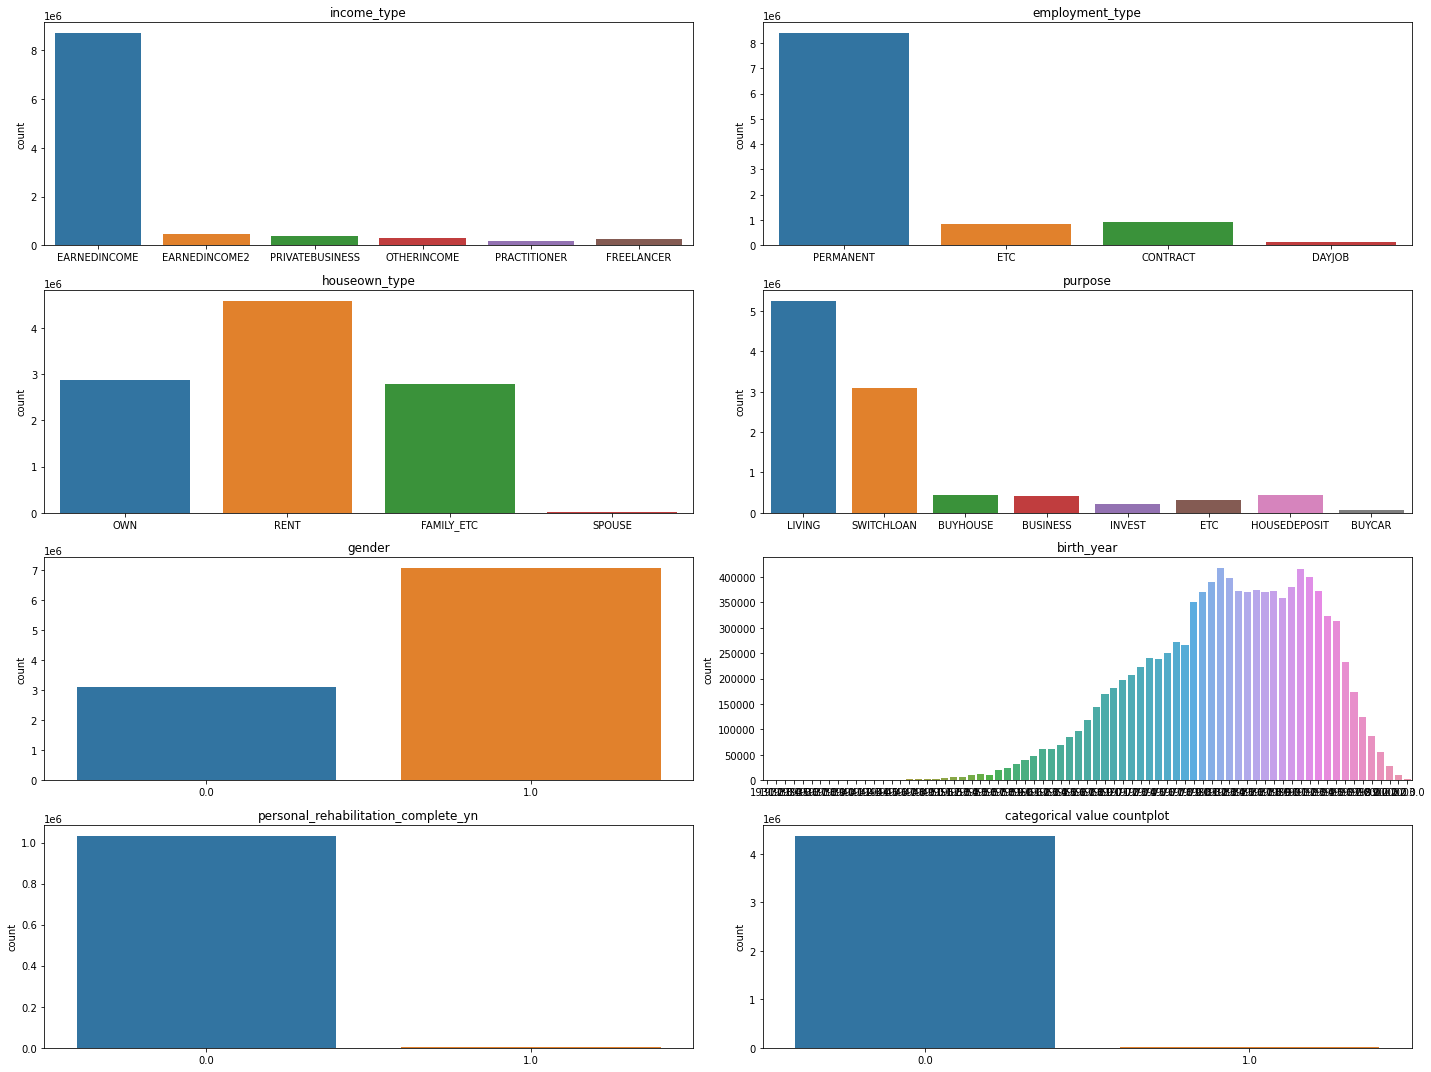

In [44]:
count_plot(figsize=(20,15), plotnum=(4,2), data=merge_train, col_list=cat_col, title="categorical value countplot")

#### [시각화, countplot] 타깃 분포

/content/gdrive/My Drive/빅콘테스트_2022/img/target value countplot.png
그림 저장 :  target value countplot


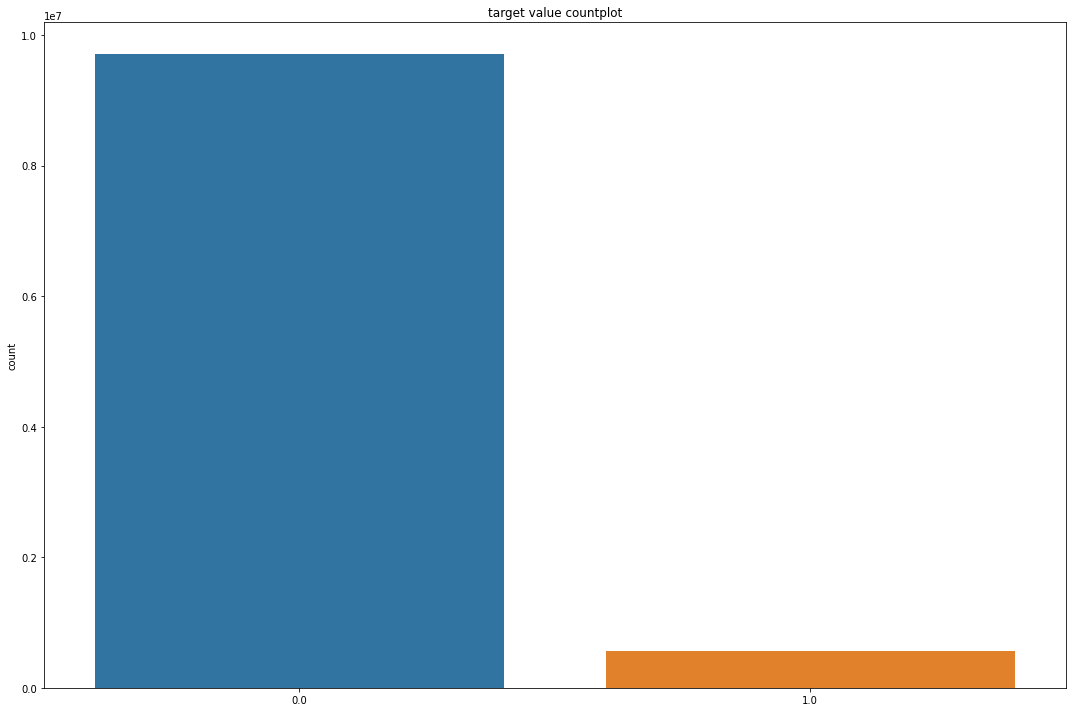

In [47]:
count_plot(figsize=(15,10), plotnum=(1,1), data=merge_train, col_list=y_col, title="target value countplot")

타깃이 심각하게 불균형. 오버샘플링 등의 추가적인 기법 활용 필요

### 수치형 데이터 분포

#### 통계

In [45]:
merge_train[num_col].describe()

,yearly_income,company_enter_month,credit_score,existing_loan_cnt,loan_rate,existing_loan_amt,loan_limit,desired_amount
count,1.027001e+07,9.966443e+06,9.026199e+06,8.126200e+06,1.026439e+07,7.225871e+06,1.026439e+07,1.027001e+07
mean,4.791943e+07,2.017741e+05,7.500421e+02,3.645592e+00,1.276589e+01,8.167405e+07,2.260828e+07,5.159147e+07
std,1.318759e+08,5.427454e+02,1.274872e+02,3.145768e+00,3.886452e+00,9.824103e+07,2.230741e+07,2.323399e+08
min,0.000000e+00,1.911090e+05,1.000000e+02,1.000000e+00,1.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.900000e+07,2.017010e+05,6.500000e+02,1.000000e+00,9.500000e+00,2.500000e+07,9.000000e+06,1.000000e+07
50%,3.600000e+07,2.020030e+05,7.300000e+02,3.000000e+00,1.320000e+01,4.900000e+07,1.800000e+07,2.800000e+07
75%,5.000000e+07,2.021070e+05,8.600000e+02,5.000000e+00,1.580000e+01,9.600000e+07,3.300000e+07,5.000000e+07
max,1.000000e+10,2.022110e+05,1.000000e+03,1.780000e+02,2.000000e+01,7.512000e+09,1.000000e+10,1.000000e+10


#### [시각화, histplot] 수치형 분포


reference

* https://seaborn.pydata.org/generated/seaborn.displot.html

* https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221728411362

* https://suy379.tistory.com/122


/content/gdrive/My Drive/빅콘테스트_2022/img/numerical value histplot.png
그림 저장 :  numerical value histplot


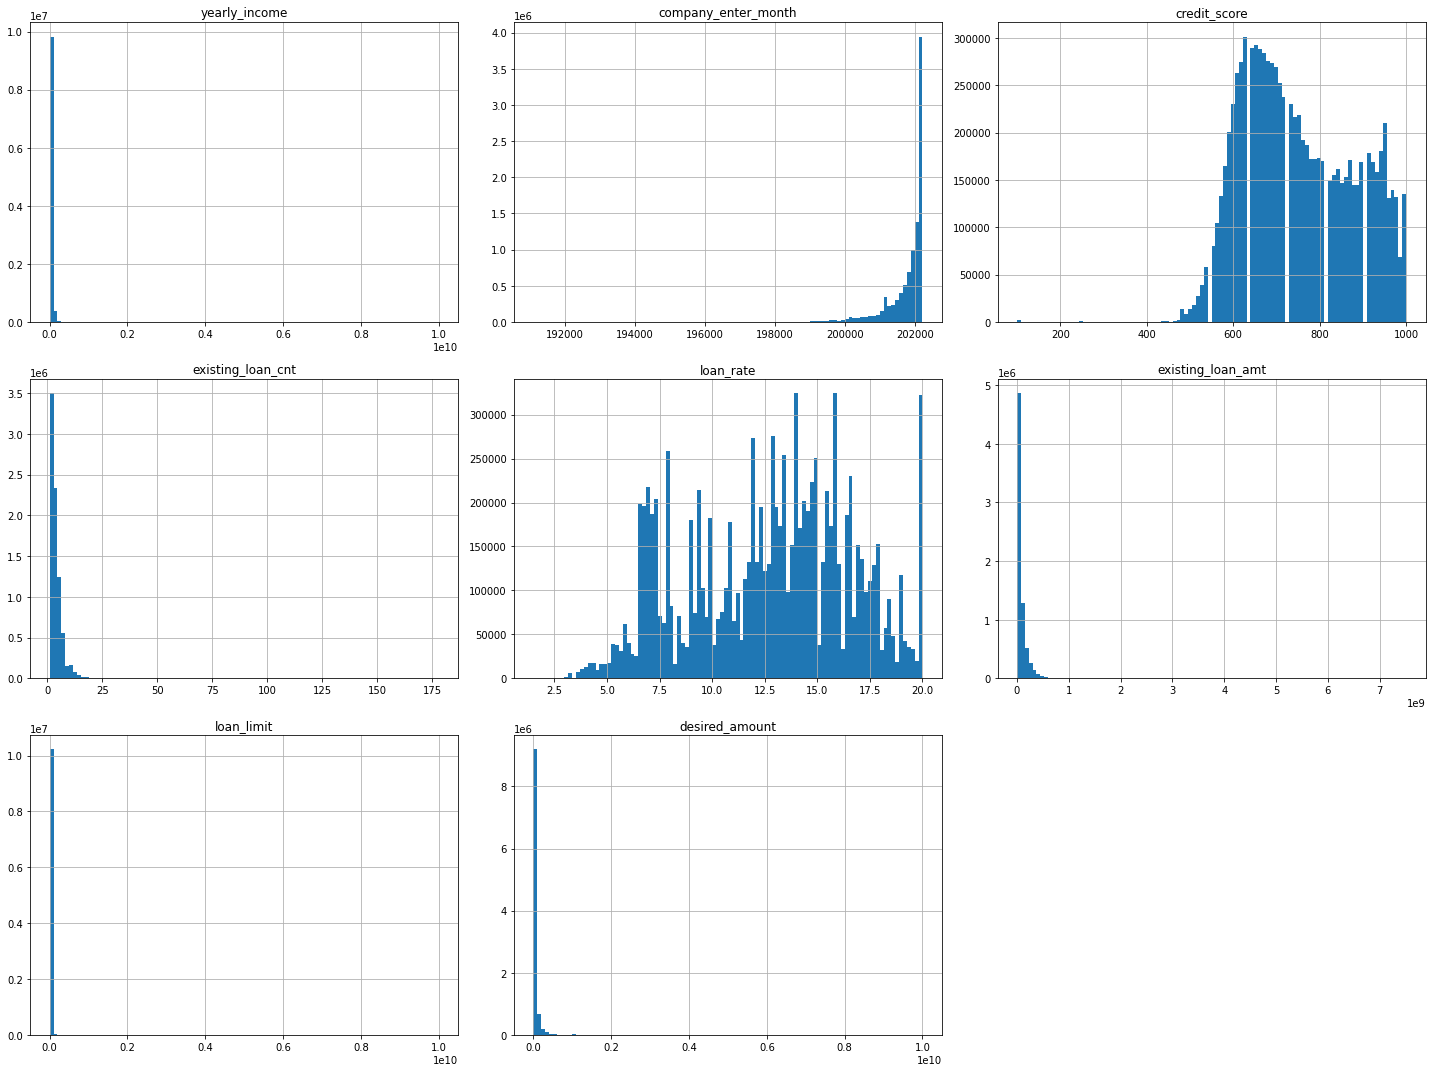

In [48]:
merge_train[num_col].hist(bins=100, figsize=(20,15))
plt.title("numerical value histplot")
save_fig("numerical value histplot")

In [61]:
tmp = merge_train['yearly_income'] / 1000000

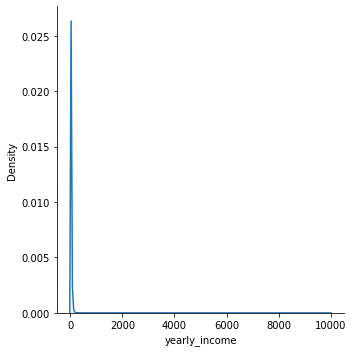

In [71]:
sns.displot(data=tmp, kind="kde")
plt.show()

In [ ]:
# # bivariate plot - 두 변수 간 상관관계 플롯
# sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

## 전처리